## heart disease prediction 


we're going to take the following approach 
1. problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

#### 1) problem defination - Given clinical parameters about a patient ,can we predict wheather or not they have heart disease

## 2)data

#### we got data from kaggle

### 3)evaluation - if we reach 95%accuaracy at predicting wheater or not a patient has heart disease during the proof of concept , we'll pursue the project

## 4) features of dataset 

create a dictionary

Create data dictionary

1.age - age in years

2.sex - (1 = male; 0 = female)

3.cp - chest pain type
     0: Typical angina: chest pain related decrease blood supply to the heart
     
     1: Atypical angina: chest pain not related to heart
     
     2: Non-anginal pain: typically esophageal spasms (non heart related)
     
     3: Asymptomatic: chest pain not showing signs of disease

4.trestbps - resting blood pressure (in mm Hg on admission to the hospital)                anything above 130-140 is typically cause for concern

5.chol - serum cholestoral in mg/dl
    
    serum = LDL + HDL + .2 * triglycerides
    
    above 200 is cause for concern

6.fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        '>126' mg/dL signals diabetes

7.restecg - resting electrocardiographic results
   0: Nothing to note
   
   1: ST-T Wave abnormality
      can range from mild symptoms to severe problems
      signals non-normal heart beat
   
   2: Possible or definite left ventricular hypertrophy
      Enlarged heart's main pumping chamber

8.thalach - maximum heart rate achieved

9.exang - exercise induced angina (1 = yes; 0 = no)

10.oldpeak - ST depression induced by exercise relative to rest looks at                 stress of heart during excercise unhealthy heart will stress more

11.slope - the slope of the peak exercise ST segment
    0: Upsloping: better heart rate with excercise (uncommon)
   
    1: Flatsloping: minimal change (typical healthy heart)
    
    2: Downslopins: signs of unhealthy heart

12.ca - number of major vessels (0-3) colored by flourosopy
    colored vessel means the doctor can see the blood passing through
    the more blood movement the better (no clots)

13.thal - thalium stress result
    1,3: normal
    
    6: fixed defect: used to be defect but ok now
    
    7: reversable defect: no proper blood movement when excercising

14.target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [1]:
#preparing the tools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#models from scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#models Evaluation

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay


In [2]:
#load the data

df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### data explorations

The goal here is to find out more about the data and become a subject matter expert on the dataset youre working with
1. what question you are trying to solve ?
2. what kind of data do we have and how do we treat different types?
3. what missing from the data and how you deal with it?
4. where are the outliers and why should you care about them?
5. how can you add, change or remove features to get more out of your data?


In [3]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

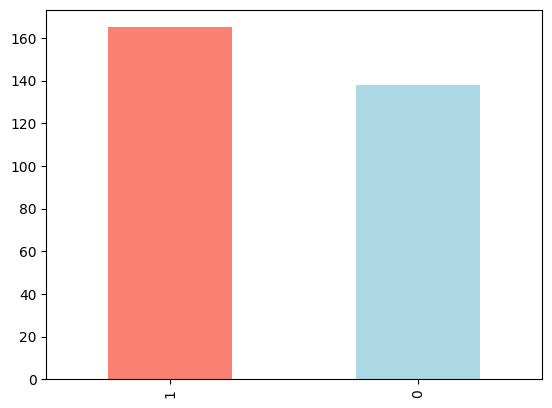

In [4]:
df["target"].value_counts().plot(kind="bar" , color=["salmon","lightblue"]);

In [5]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## heart disease frequency according to sex

In [8]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [9]:
#compare target column with sex column

pd.crosstab(df.target , df.sex)

sex,0,1
target,,
0,24,114
1,72,93


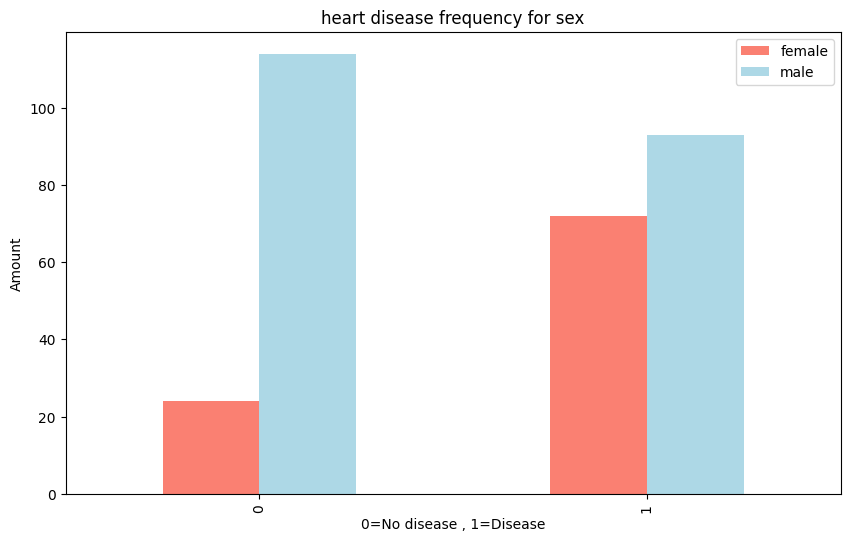

In [10]:
#create a plot of crosstab

pd.crosstab(df.target , df.sex).plot(kind = "bar" , figsize=(10,6)
                                                  ,color=["salmon","lightblue"])

plt.title("heart disease frequency for sex")
plt.xlabel("0=No disease , 1=Disease")
plt.ylabel("Amount")
plt.legend(["female" , "male"]);

### Age vs Max heart rate for heart disease`

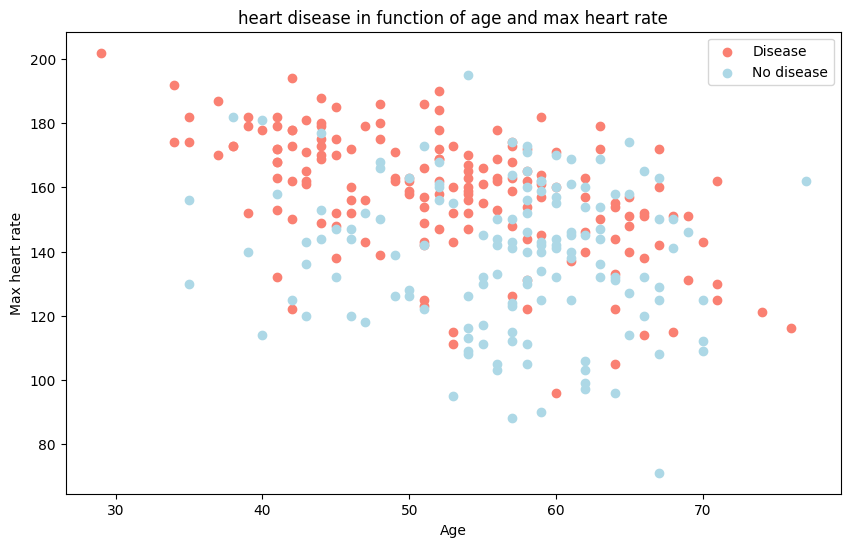

In [11]:
#create another figure

plt.figure(figsize=(10,6))

#scatter with positive examples

plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")

#scatter with negative examples

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c = "lightblue");

#add some helpful info

plt.title("heart disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease" , "No disease"]);

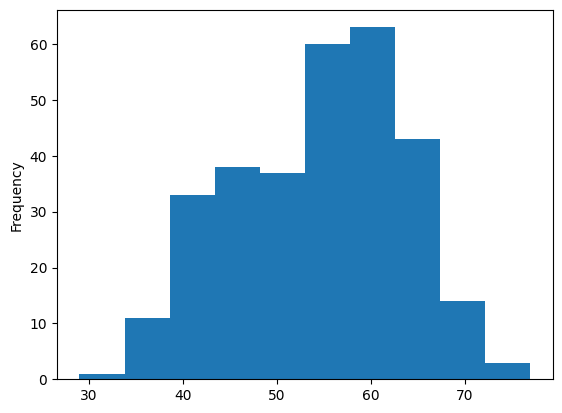

In [12]:
#check the distributions of age

df.age.plot.hist();

In [13]:
#heart disease frequncy for chest pains

pd.crosstab(df.cp , df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


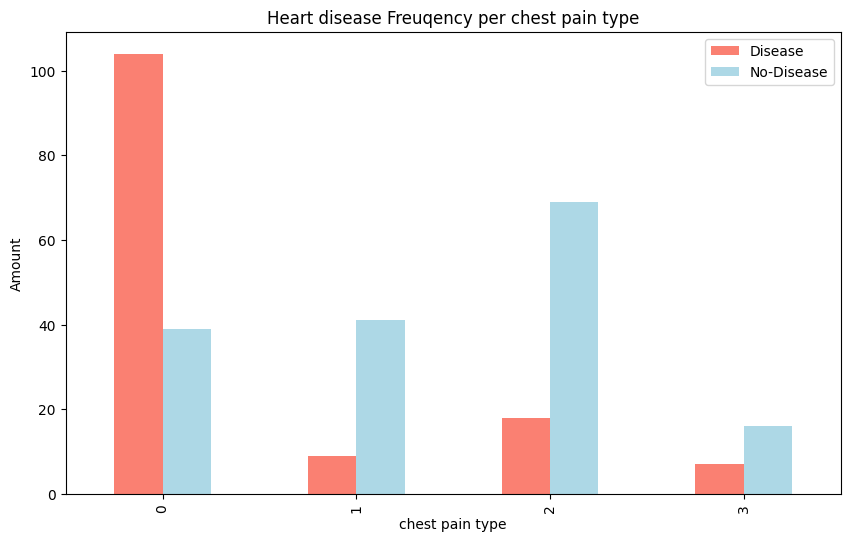

In [14]:
#MAKE THE CRosstab more visual

pd.crosstab(df.cp , df.target).plot(kind="bar" , figsize=(10,6),
                                   color = ["salmon","lightblue"]);

plt.title("Heart disease Freuqency per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("Amount")
plt.legend(["Disease" , "No-Disease"]);

In [15]:
#make a correlation matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


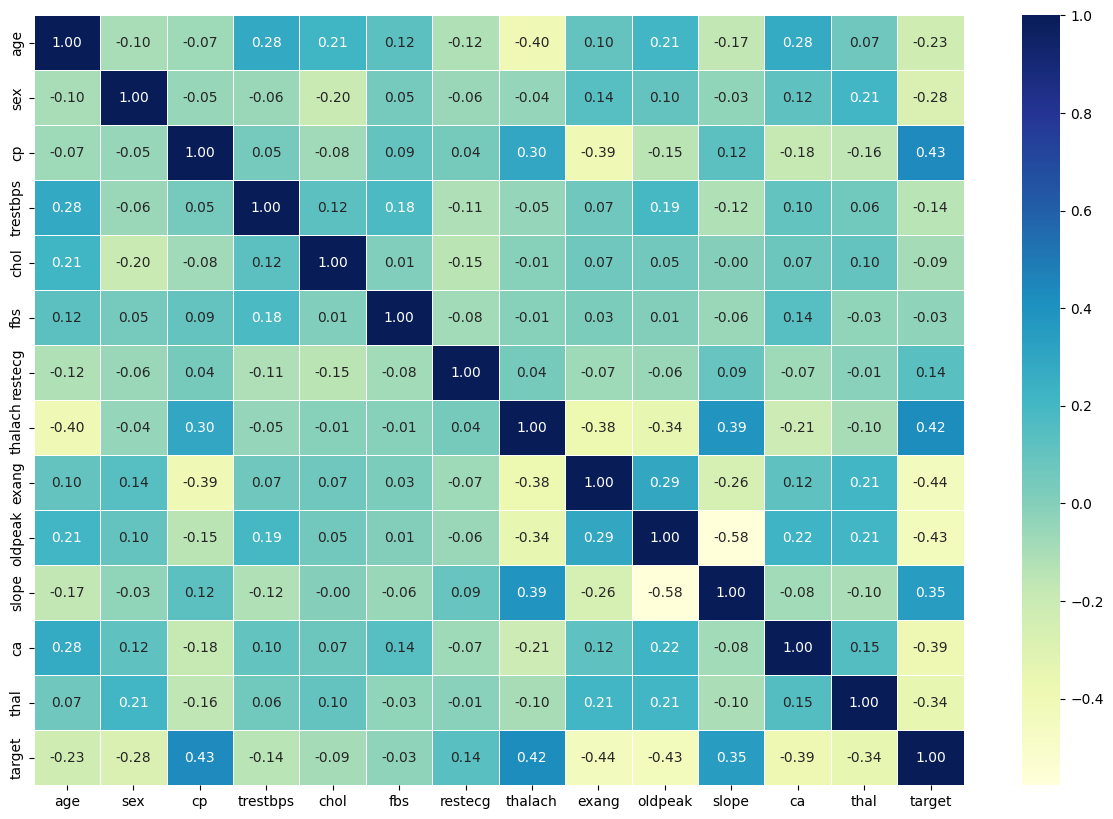

In [16]:
# lets make a correlatuon matrix a little prettier

corr_matrix = df.corr()

fig,ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(corr_matrix,
                 annot=True,
                  linewidth = 0.5,
                  fmt = ".2f",
                  cmap = "YlGnBu");

## 5.0 Modelling



In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
np.random.seed(42)

x = df.drop("target" , axis=1)
y = df["target"]

x_train ,x_test , y_train , y_test = train_test_split(x , y ,test_size = 0.2)


### # now we've got our data split into training and test data

# we are going to try on 3 different models

# 1) logistic regression
# 2) k-nearest Neighbours classifier
# 3) Random-Forest Classifier


In [19]:
#put models in dictionary

models = {"logistic Regression" : LogisticRegression(),
           "KNN" : KNeighborsClassifier(),
            "Random Forest" : RandomForestClassifier()}

#create a function to fit and score models

def fit_and_score(models , x_train , x_test , y_train , y_test):
    
    np.random.seed(42)
    
    #make a dictionary to keep model scores
    model_scores = {}
    
    #loop through models
    
    for name , model in models.items():
        model.fit(x_train , y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test , y_test)
        
    return model_scores

In [20]:
model_scores = fit_and_score(models = models , x_train = x_train ,x_test= x_test, y_train=y_train, y_test=y_test)
model_scores

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

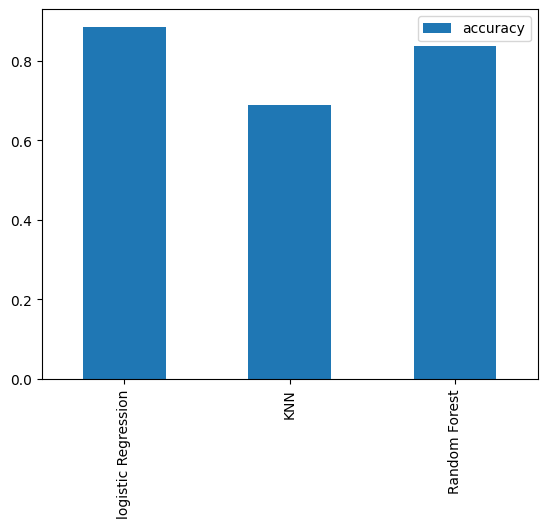

In [21]:
model_compare = pd.DataFrame(model_scores , index = ["accuracy"])
model_compare.T.plot.bar();

##  tunning/improve the model
1) hyperparameters tunning
2) feature importance
3) confusion matrix
4) cross-validation
5) precision
6) Recall
7) F1 score
8) classification report
9) ROC curve
10) Area under the curve(AUC)


#### 1. hyperparameter tuning

In [22]:
#lets tune KNN

train_scores = []
test_scores  = []

#create a list of different values for n_neighbors

neighbors = range(1,21)

#setup KNN instance

knn = KNeighborsClassifier()

#loop through different n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors=1)
    
    #fit the algorithm
    knn.fit(x_train , y_train)
    
    #update the training scores list
    train_scores.append(knn.score(x_train , y_train))
    
    #update the scores list
    
    test_scores.append(knn.score(x_test,y_test))

In [23]:
train_scores

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [24]:
test_scores

[0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312]

Maximum knn score on the test data : 62.30%


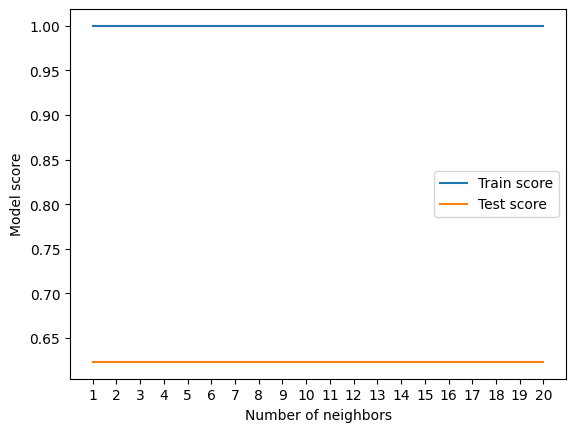

In [25]:
plt.plot(neighbors , train_scores , label="Train score")
plt.plot(neighbors , test_scores , label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors");
plt.ylabel("Model score")
plt.legend()

print(f"Maximum knn score on the test data : {max(test_scores)*100:.2f}%")

## hyperparameter tunning with Randomizedseachcv


we re going to tune:

* logisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCv


In [26]:
#create a hyperparameter grid for logistic regression

log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":["liblinear"]}

#create a hyperparameters grid for RandomForestClassifier

rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

### Now we'he got hyperparameterse grids setup for each of our models , let's tune them using Randomizedsearchcv

In [27]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [28]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [29]:
rs_log_reg.score(x_test , y_test)


0.8852459016393442

### Now we'he tuned logisticRegression(),lets do the same for RandomForestClassifier()..

In [30]:
#setup random seed

np.random.seed(42)


#setup random hyperparameter search for RandomForestCassifier()

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv=5,
                           n_iter = 20 ,
                           verbose = True)

#Fit random hyperparameter search model for RandomForestClassifier()

rs_rf.fit(x_train , y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [31]:
#find the best hyperparameters

rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [32]:
rs_rf.score(x_test , y_test)

0.8688524590163934

### hyperparamter tuning with GridseachCv

since our logisticregression model provides the best scores so for we'll try and improve them again using GridsearchCV

In [33]:
#different hyperparamter for us logisticRegressionmodel

log_reg_grid = {"C":np.logspace(-4,4,30),
                "solver":["liblinear"]}

#setup grid hyperparameter search for Logistic regression

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv = 5,
                         verbose = True)

#fit grid hyperparameter search model

gs_log_reg.fit(x_train , y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [34]:
#check the best params

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [35]:
gs_log_reg.score(x_test , y_test)

0.8852459016393442

### Evaluating out tuned machine learning classifier , beyond accuracy 
* Roc curve and AuC Curve
* Confusion matrix 
* Classification report
* precision
* recall 
* F1-score

...and it would be great if cross-validation was used where possible

To make comparisions and evaluate our trained model,first we need to make predictions

In [36]:
#make predictio with tuned model

y_preds = gs_log_reg.predict(x_test)

In [37]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [38]:

#confusion matrix 
print(confusion_matrix(y_test , y_preds))


[[25  4]
 [ 3 29]]


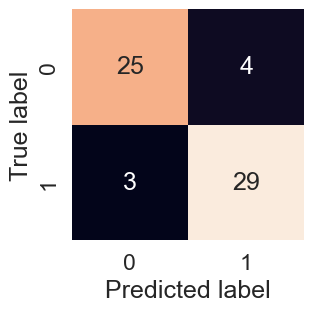

In [39]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

### Now we got roccurve and confusion matrix lets get classification report and cross validated precison , recall and f1 score

In [40]:
print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### calculate evaluation metrics using cross-validation 

we're going to calculate precision , recall and f1-score of our model using cross-validation and to do so we'll be using

In [41]:
# check best hyperparameters 

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [42]:
#create a new classifier with best parameters

clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')

In [43]:
#cross-validated accuracy

cv_acc = cross_val_score(clf,x,y,cv=5,scoring="accuracy")

cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [44]:

cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [45]:
#cross-validated precison
cv_precision = cross_val_score(clf,x,y,cv=5,scoring="precision")

cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [46]:
#cross-validated recall

cv_recall = cross_val_score(clf,x,y,cv=5,scoring="recall")


cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [47]:
#cross-validated f1 score

cv_f1 = cross_val_score(clf,x,y,cv=5,scoring="f1")


cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

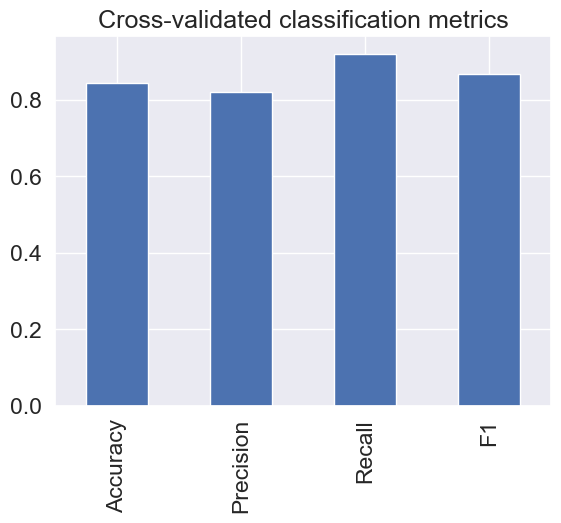

In [48]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);


## feature importance

Feature importance is another as asking , "which contributed most to the outcomes of the model and how did they contribute"? 

In [49]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [50]:
#fit an instance of logistic regression


clf = LogisticRegression(C = 0.20433597178569418,
                         solver = 'liblinear')

clf.fit(x_train , y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [52]:
#check coef

clf.coef_

array([[ 0.00316728, -0.86044626,  0.66067051, -0.01156993, -0.00166374,
         0.04386115,  0.31275826,  0.02459361, -0.60413065, -0.5686282 ,
         0.45051623, -0.63609885, -0.67663373]])

In [53]:
#match the features to columns

feature_dict = dict(zip(df.columns , list(clf.coef_[0])))
feature_dict

{'age': 0.0031672775125744686,
 'sex': -0.8604462617531493,
 'cp': 0.6606705112737149,
 'trestbps': -0.011569930915493508,
 'chol': -0.0016637441846093658,
 'fbs': 0.04386114942757081,
 'restecg': 0.3127582620910283,
 'thalach': 0.02459361246994142,
 'exang': -0.6041306524707951,
 'oldpeak': -0.568628196677622,
 'slope': 0.4505162332451247,
 'ca': -0.636098853689775,
 'thal': -0.6766337271477075}

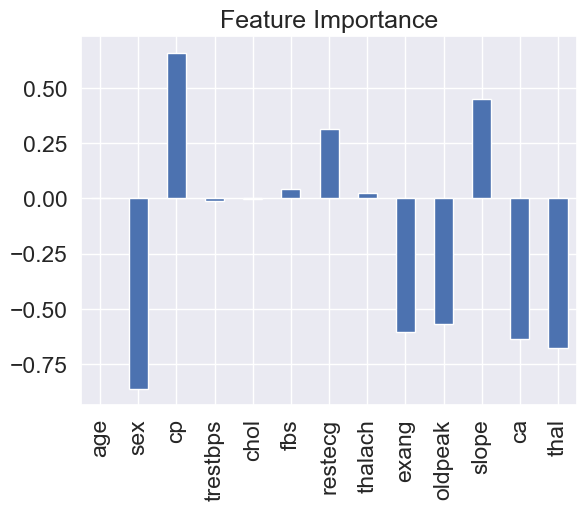

In [54]:
#visualize feature importance

feature_df = pd.DataFrame(feature_dict , index=[0])
feature_df.T.plot.bar(title ="Feature Importance",legend=False);

## 6 Experimentation

If you havent hit your evaluation metric yet... ask yourself...

* could you collect more data ? 
* could you try a better model?Like catboost or xgboost?
* could you improve the current models? (beyond what we'he done so far)
* if your model is good enough (you have hit your evaluation metric) how would you export it and share it with others
                                         